### Nvidia Self -Driving Netork Simulation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random


Using TensorFlow backend.


### NVIDIA CNN Model

- This is an Implmentation of Nvidia's End to End Steer control as follows
![](https://devblogs.nvidia.com/wp-content/uploads/2016/08/training-624x291.png)

- Below is network architecture
![](https://devblogs.nvidia.com/wp-content/uploads/2016/08/cnn-architecture-624x890.png)

![](https://ai-mrkogao.github.io/pictures/clonedriving/clonearchitecture.png)

In [2]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))

    model.add(Convolution2D(64, 3, 3, activation='elu'))
    #   model.add(Dropout(0.5))
    model.add(Flatten())

    model.add(Dense(100, activation = 'elu'))
    #   model.add(Dropout(0.5))
    model.add(Dense(50, activation = 'elu'))
    #   model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'elu'))
    #   model.add(Dropout(0.5))
    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model


In [3]:
model = nvidia_model()
print(model.summary())


/home/home9second/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", strides=(2, 2), input_shape=(66, 200, ...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/home9second/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/home/home9second/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/home/home9second/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/home/home9sec

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

### Data Loading

In [6]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('./behavirol-cloning/track/driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


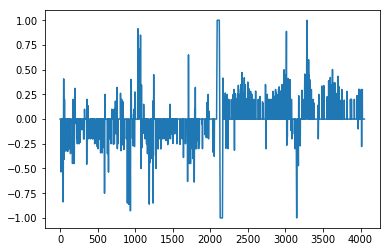

In [7]:
%matplotlib inline
plt.plot(data['steering'])
plt.show()

In [18]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)


def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        # left image append
        image_path.append(os.path.join(datadir,left.strip()))
        steering.append(float(indexed_data[3])+0.15)
        # right image append
        image_path.append(os.path.join(datadir,right.strip()))
        steering.append(float(indexed_data[3])-0.15)
    
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings
 
image_paths, steerings = load_img_steering('./behavirol-cloning/track/IMG', data)



In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))


Training Samples: 9727
Valid Samples: 2432


In [20]:
X_train[0],y_train[0]

('./behavirol-cloning/track/IMG/right_2018_07_16_17_11_57_326.jpg', -0.15)

### Image Preprocessing

- Augmentation

After selecting the final set of frames, we augment the data by adding artificial shifts and rotations to teach the network how to recover from a poor position or orientation. The magnitude of these perturbations is chosen randomly from a normal distribution. The distribution has zero mean, and the standard deviation is twice the standard deviation that we measured with human drivers. Artificially augmenting the data does add undesirable artifacts as the magnitude increases (as mentioned previously)

![](https://ai-mrkogao.github.io/pictures/clonedriving/imagecrop.png)

In [21]:
# scale up to 1.3
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image


In [22]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

Text(0.5, 1.0, 'Zoomed Image')

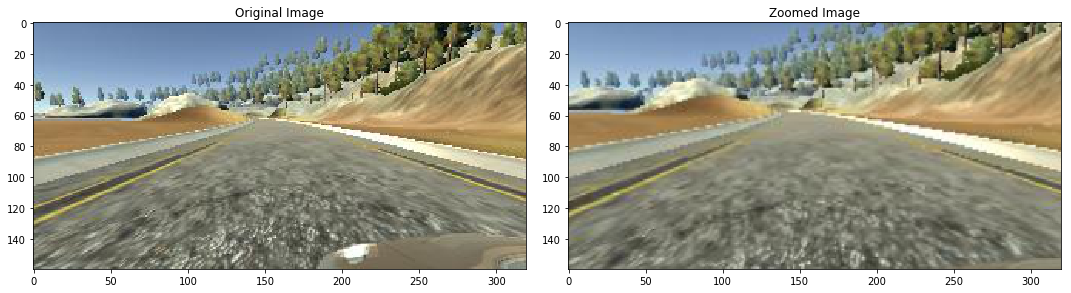

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [24]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image


Text(0.5, 1.0, 'Panned Image')

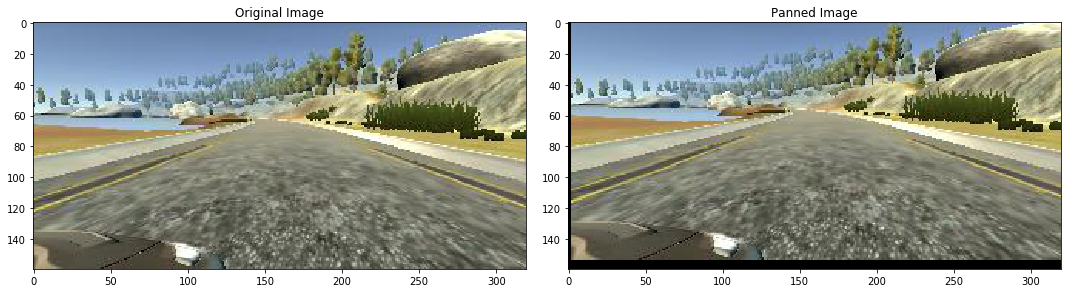

In [25]:

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [30]:
def img_random_brightness(image):
    brightness = iaa.Multiply((-0.2, 1.2))
    image = brightness.augment_image(image)
    return image


Text(0.5, 1.0, 'Brightness altered image ')

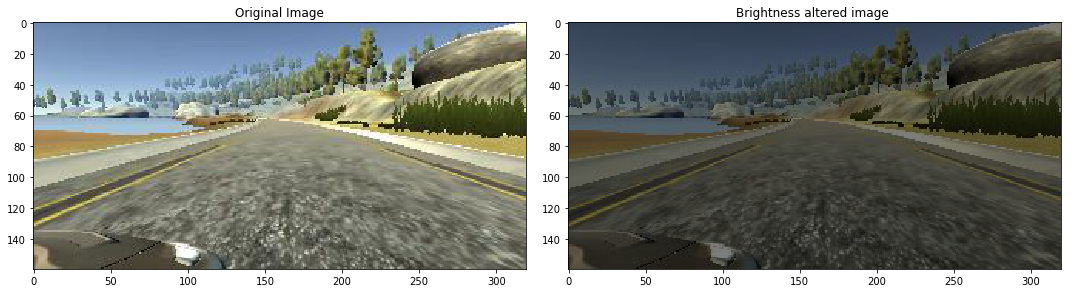

In [31]:

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [ ]:

def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

### Batch Generator

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)
            
        yield (np.asarray(batch_img), np.asarray(batch_steering)) 

### Train


## Training Strategy

![](https://ai-mrkogao.github.io/pictures/clonedriving/trainingcamera.png)


-    Training data from three cameras (left,center,right)
-    record two laps on track 1 using center lane driving
-    This is because we need to handle the issue of recovering from being off-center driving
-    If we train the model to associate a given image from the center camera with a left turn, then we could also train the model to associate the left camera image with a somewhat softer left turn -And we could train the model to associate right camera image with an even harder left turn
-    To estimate the steering angle of the left and right images, it uses a correction value of 0.2(in radians) in model.py turning
![](https://ai-mrkogao.github.io/pictures/clonedriving/turning.png)
-    It found this model doesn’t perform well in sharp turns



## Data Balancing

-    Collected Data in not balanced, we can see the steering angle histogram as shown below and data balancing is a crucial step for network to have a good performance

![](https://ai-mrkogao.github.io/pictures/clonedriving/databalancing.png)

![](https://ai-mrkogao.github.io/pictures/clonedriving/databalancing2.png)

In [ ]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)
